# Data and Visualization
###                                                                                                                                         Dhananjay Arora

# INTRODUCTION

Machine learning, these days is not only machine which is learning from the past. It started with the pattern recognition and computers learning on its own without the need of being explicitly programmed. But now, researchers want to computer to learn from data and perform tasks on its own. Some examples are:
- Self driving Google car
- Online recommendation offers as offers from Netflix
- Fraud detection

Only should know all mathematical concepts thoroughly in order to implement a good machine learning algorithm successfully.

**Regression analysis** is a part of statistical modeling which assists in estimating relationships among variables. It helps in modeling and analyzing variables with focus on one dependent variable and one or more independent variables.

Firstly, data is fetched from a file; then pre-processing is done (transformation of raw data into understandable format), in which data is cleaned and important feature values are also taken into consideration etc. After that comes the most important task which is data visualization. It is important because large data means nothing unless some graphs are plotted based on that and some visualization is done.
After that comes the preliminary observation; which says, what is being understood or concluded based on the tasks performed before.

# DATA

## 1. Regression

## a) Introduction of data for regression & source

This dataset contains the hourly count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**Source of the data**

This data is picked from UCI machine learning repository.
Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.
URL for UCI repository - http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

## b) Reading the data

- The data is present in a comma separated value file.
- Header information is there in the CSV file.

In [1]:
# importing the important libraries
import pandas as pd
import numpy as np
import matplotlib as matpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as scipyst

In [2]:
complete_dataset= pd.read_csv("C:\\Users\\arora\\Documents\\Bike-Sharing-Dataset\\hour.csv")

## c) Preprocessing of the data

Checking the data type and file storage size as below:

In [3]:
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Printing count of rows and columns as below:

In [4]:
complete_dataset.shape

(17379, 17)

Performing some basic mathematical function on data set using describe() as below:

In [5]:
complete_dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Listing the top 10 rows as below:

In [6]:
complete_dataset.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Listing the last 10 rows as below:

In [7]:
complete_dataset.tail(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17369,17370,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
17370,17371,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
17371,17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
17372,17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164
17373,17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Checking whether the dataset contains any null value as below:

In [8]:
complete_dataset.isnull().sum().sort_values(ascending=False)

cnt           0
weekday       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
workingday    0
registered    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
instant       0
dtype: int64

There is no null value in the dataset as it can be seen above.

## d) Visualization of the data

Now we will vizualize the dataset.
Finding the correlation of all features with respect to count as below:

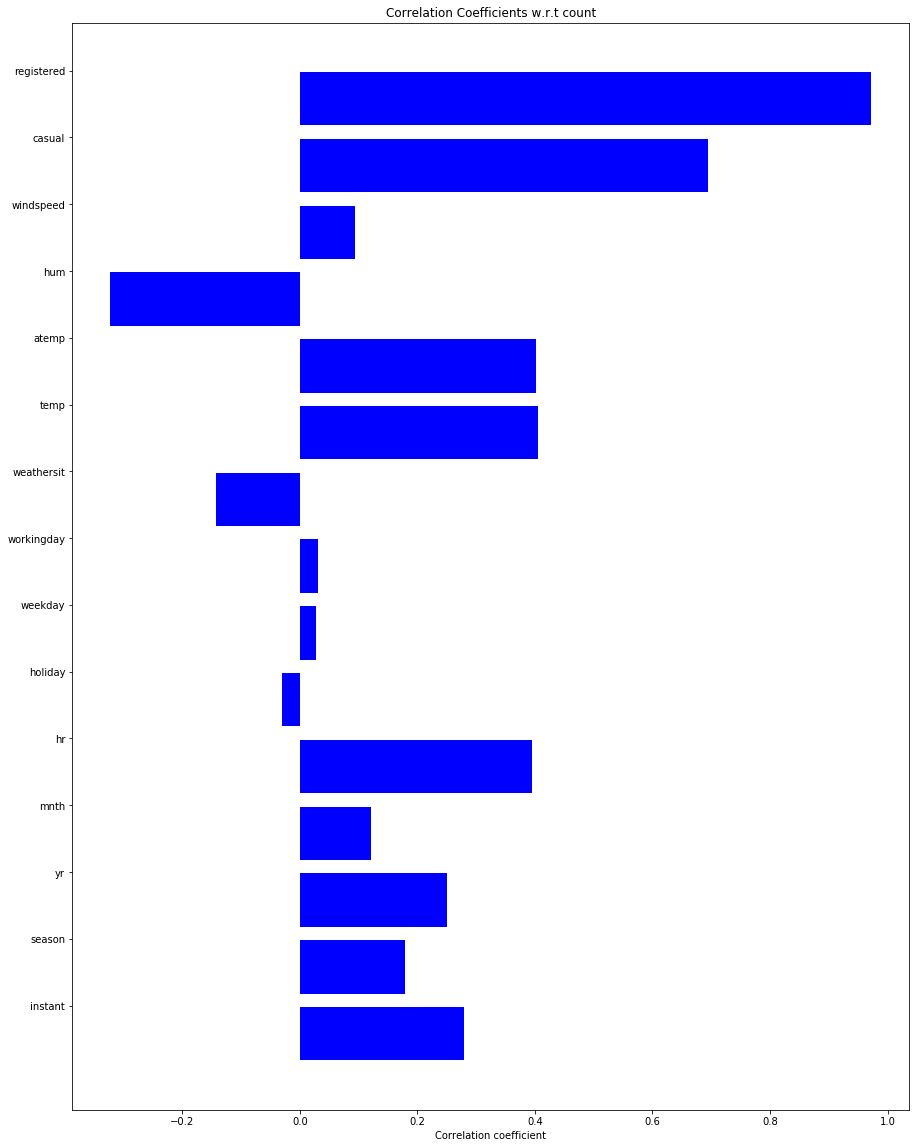

In [9]:
num_features=complete_dataset.columns[complete_dataset.dtypes!=object]
num_features=num_features[0:-1]

labels = []
values = []


for col in num_features:
    labels.append(col)
    values.append(np.corrcoef(complete_dataset[col].values, complete_dataset.cnt.values)[0,1])

calc = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots(figsize=(15,20))
rectangl = ax.barh(calc, np.array(values), color='blue')
ax.set_yticks(calc+((width)/1.9))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t count");

In the above image, it can be seen that number of registered users who use rental bikes is more than number of casual users.

Moreover, on working days bikes are rented more than on holidays.

Next, we will visualize **Correlation Matrix**:

It consists of a table depicting correlation coefficients among variables. Every entry in the table depicts the correlation among two variables.

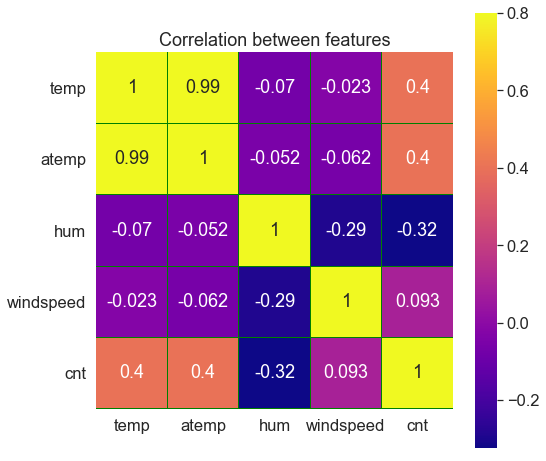

In [10]:
correlation_matrix=complete_dataset[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(8, 8))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='plasma',linecolor="green")
plt.title('Correlation between features');

Above is the depiction of correlation between different features in the dataset.

Normalized temperature in Celsius is almost same as Normalized feeling temperature in Celsius, as per the figure above.

Below is the depiction of some features using pairplot:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


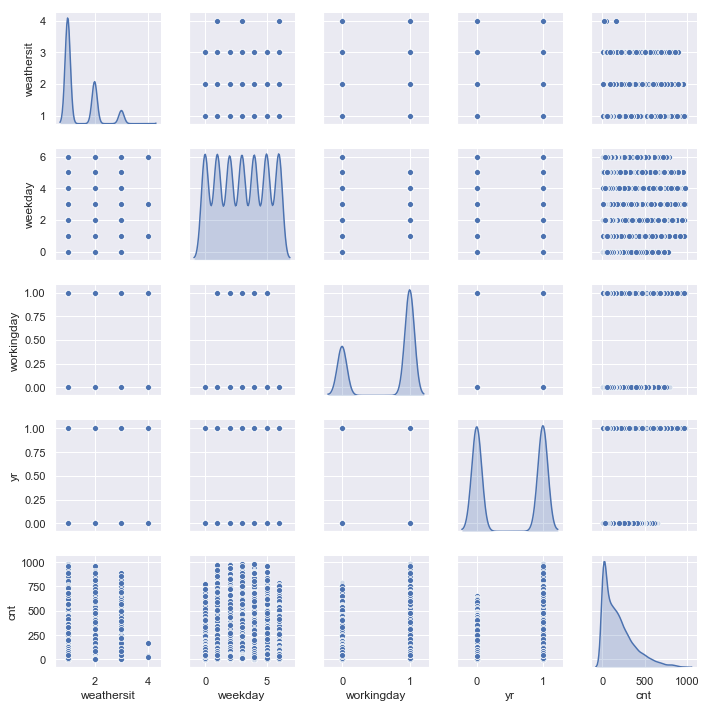

In [11]:
sns.set()
columns = ['weathersit', 'weekday', 'workingday', 'yr', 'cnt']
sns.pairplot(complete_dataset[columns],height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

From the above pair-plot, it can be seen that very few bikes are rented when the weather condition is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog as compared to other weather conditions.

Also, It can be observed that on Satudays and Sundays, bikes are rented less as compared to other days.

On a working day, bikes are rented more. (*working days exclude holidays too*).

Bikes were rented more in year 2012 as compared to year 2011.

**Plotting the Distribution Curves for the feature variables as below:**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


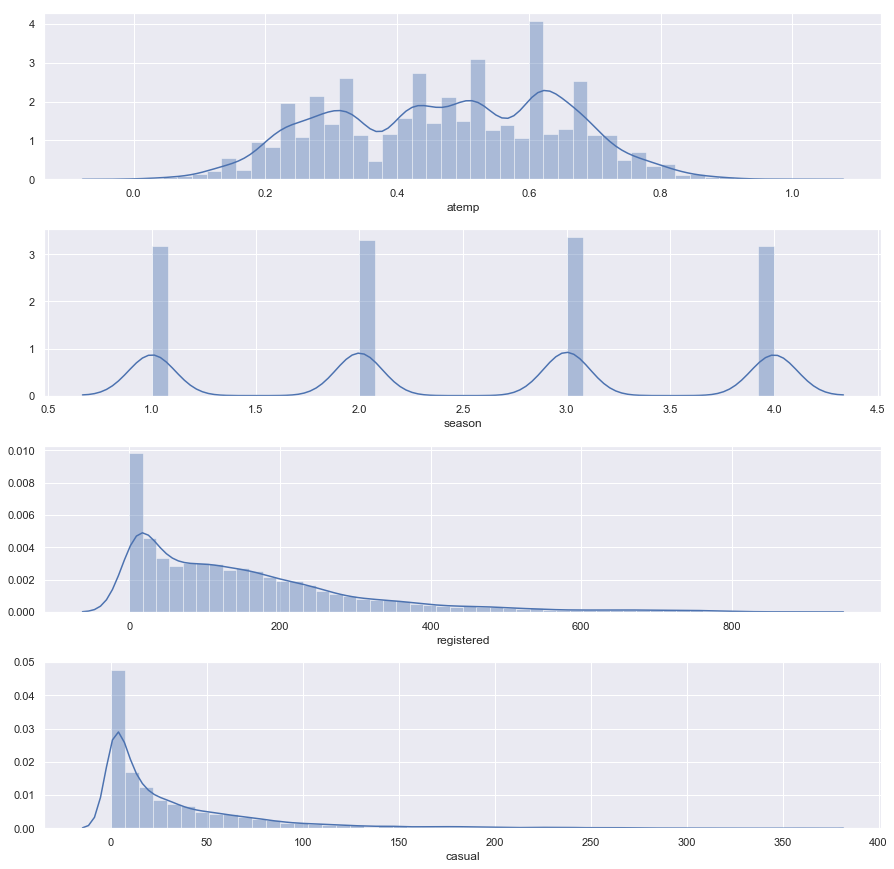

In [12]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html - Reference
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
distribution_plot_list=['atemp', 'season', 'registered', 'casual']
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 5):
    ax = fig.add_subplot(4,1, i)
    ax = sns.distplot(complete_dataset[distribution_plot_list[(i-1)]])

From the above figure, it can be observed that the values of Normalized feeling temperature is equally distributed.
    Also, highest registered customer count is around 850+ on a single day and highest casual customer count on a single day is somewhere around 350. Seasons are almost equally distributed where values denote(1:springe, 2:summer, 3:fall, 4:winter).

**Bar-plot of weather condition is as below:**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


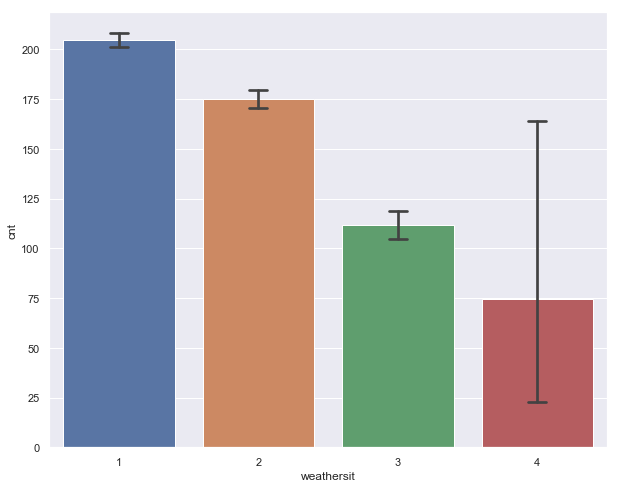

In [13]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="weathersit", y="cnt", data=complete_dataset, capsize=.13)

Above bar plot shows that bikes are rented most when weather condition is 1; lesser than 1 in weather condition 2; lesser than 2 in weather condition 3 and least in weather condition 4. 

Below are those weather conditions:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Below is the point-plot for count vs normalized humidity**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


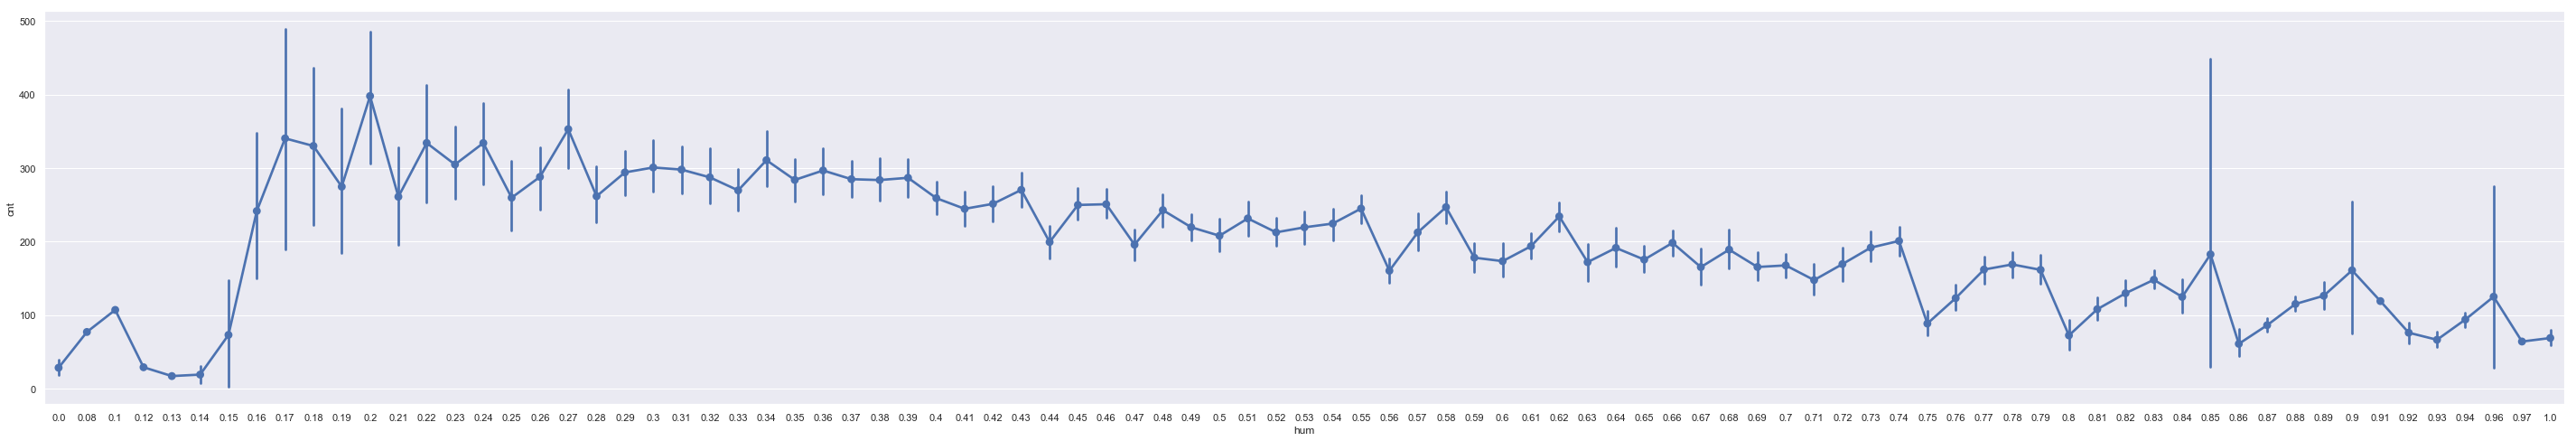

In [14]:
plt.figure(figsize=(50,8))
ax = sns.pointplot(x="hum",y="cnt",data= complete_dataset)

Upon zooming above point-plot, it can be seen that most bikes are rented when normalized humidity value is near 0.2

**Below point-plot shows count of bikes vs weekday with heu as holiday**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


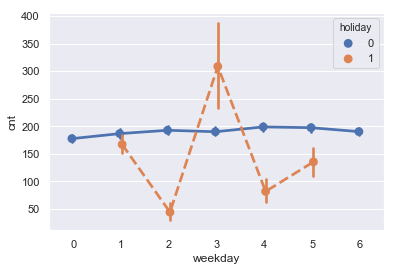

In [15]:
ax = sns.pointplot(x="weekday",y="cnt",hue="holiday",data= complete_dataset, dodge=True, linestyles=["-","--"])

From the above point plot, it can be seen that count of bikes rented is usually the same for all days when it is not a holiday. But when it is a holiday, then the count of bikes rented is most on a Wednesday and least on a Tuesday.

**Below is the bar plot for bike rented at different hours**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


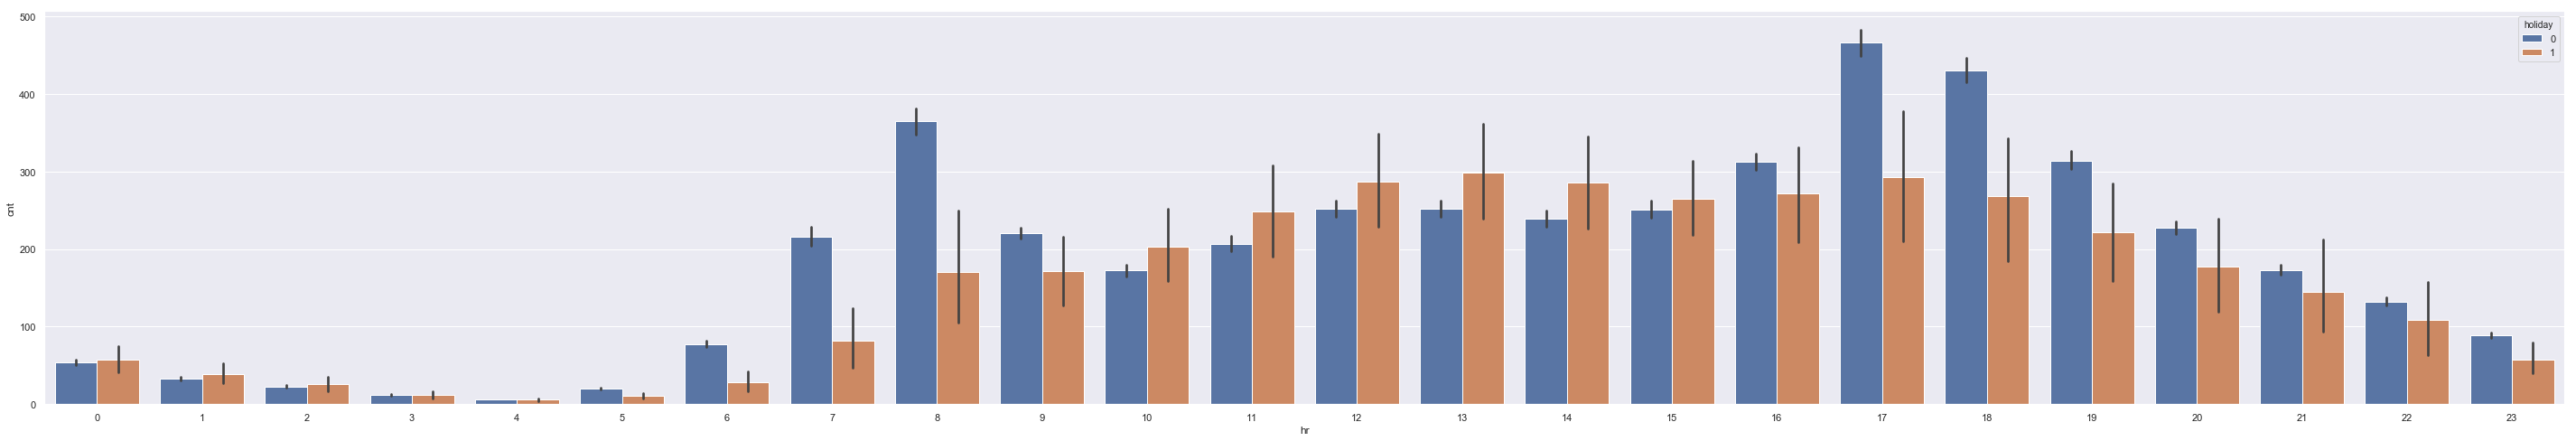

In [16]:
plt.figure(figsize=(50,8))
ax = sns.barplot(x="hr",y="cnt",hue="holiday",data= complete_dataset)

From the above graph, it can be seen that most bikes were rented at 5PM on days which were not holidays; whereas on holidays, most bikes were rented at 1PM.

## e) Preliminary observation

Below is the list of observations from the regression data provided after doing regression analysis on the basis of plots:
- Number of registered users who use rental bikes is more than number of casual users.
- Moreover, on working days bikes are rented more than on holidays.
- Normalized temperature in Celsius is almost same as Normalized feeling temperature in Celsius
- It can be said that very few bikes are rented when the weather condition is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog as compared to other weather conditions.
- Also, it can be observed that on Saturdays and Sundays, bikes are rented less as compared to other days.
- On a working day, more number of bikes are rented. (*working days exclude holidays too*).
- Bikes were rented more in year 2012 as compared to year 2011.
- Also, highest registered customer count is around 850+ on a single day and highest casual customer count on a single day is somewhere around 350+. Seasons are almost equally distributed where values denote(1:springe, 2:summer, 3:fall, 4:winter).
- Bikes are rented most when weather condition is 1; lesser than 1 in weather condition 2; lesser than 2 in weather condition 3 and least in weather condition 4. These weather conditions are namely:
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Most bikes are rented when normalized humidity value is near 0.2
- Count of bikes rented is usually the same for all days when the day is not a holiday. But when it is a holiday, then the count of bikes rented is the most on a Wednesday and least on a Tuesday.
- It can be seen that most bikes were rented at 5PM on days which were not holidays; whereas on holidays, most bikes were rented at 1PM.

Some other observations are also there and are listed above along with the plots.

# CONCLUSION

About 80% of the time was of the data scientists is usually spent in fetching and cleaning the data, which is known as data preprocessing and data scientists spend lesser time (20%) on actual working on data, that is, applying the algorithms to visualize it. 
To visualize the data, I got to know about some more python libraries which I did not know before like seaborn. I also got to learn scipy library which is used for scientific and technical computing.

# REFERENCES

[1] Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

[2] Ian Goodfellow and Yoshua Bengio and Aaron Courville. "Deep Learning", MIT Press, 2016, http://www.deeplearningbook.org

[3] "Regression analysis”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Regression_analysis

[4] Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

[5] Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

[6] Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html
